### plot_time_course

In [7]:
#!/usr/bin/env python3
# coding: utf-8

# import os, re, sys
# import glob, json
# import argparse

import numpy as np
import pandas as pd
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns

from pctk import multicellds 

sns.set(style="ticks", palette="Paired")
sns.set_context('paper')

# def create_parser():
#     parser = argparse.ArgumentParser(description="Plot total cell grouped as Alive/Necrotic/Apoptotic vs Time")
    
#     parser.add_argument("data_folder", action="store", help="folder were the data is stored")
    
#     parser.add_argument("--format", action="store", dest="format", choices=("physicell", "physiboss"),
#                         help="Format of the input data", default="physicell")

#     parser.add_argument("--figout", action="store", dest="fig_fname", default="./cell_vs_time.png",
#                         help="File name to save the plot")
                        
#     parser.add_argument("--csvout", action="store", dest="csv_fname", default=None,
#                         help="File name to store the summary table used for the plot")

#     return parser
    
# def pb_output_iterator(data_folder, sep=";"):
#     globing = os.path.join(data_folder, "cells_[0-9]*.txt")
#     for fname in sorted(glob.glob(globing)):
#         df = pd.read_csv(fname, sep=sep)
#         t = df.Time[0]
#         yield (t, df)

# def count_pb_files(data_folder):
#     globing = os.path.join(data_folder, "cells_[0-9]*.txt")
#     return len(glob.glob(globing))

In [8]:
covid_type_dict = {
    0: "default",
    1: "Epithelial",
    2: "immune",
    3: "CD8 Tcell",
    4: "macrophage",
    5: "neutrophil",
    6: "DC",
    7: "CD4 Tcell",
    8: "fibroblast"    
    }

covid_type_grouping = {
    "default": "default",
    "Epithelial": "Epithelial",
    "immune": "immune",
    "CD8 Tcell": "CD8 Tcell",
    "macrophage": "macrophage",
    "neutrophil": "neutrophil",
    "DC": "DC",
    "CD4 Tcell": "CD4 Tcell",
    "fibroblast": "fibroblast"
    }

{0: 'default', 1: 'Epithelial', 2: 'immune', 3: 'CD8 Tcell', 4: 'macrophage', 5: 'neutrophil', 6: 'DC', 7: 'CD4 Tcell', 8: 'fibroblast'}
{'default': 'default', 'Epithelial': 'Epithelial', 'immune': 'immune', 'CD8 Tcell': 'CD8 Tcell', 'macrophage': 'macrophage', 'neutrophil': 'neutrophil', 'DC': 'DC', 'CD4 Tcell': 'CD4 Tcell', 'fibroblast': 'fibroblast'}
	Processing time step: 0
	Processing time step: 15
	Processing time step: 30
	Processing time step: 45
	Processing time step: 60
	Processing time step: 75
	Processing time step: 90
	Processing time step: 105
	Processing time step: 120
	Processing time step: 135
	Processing time step: 150


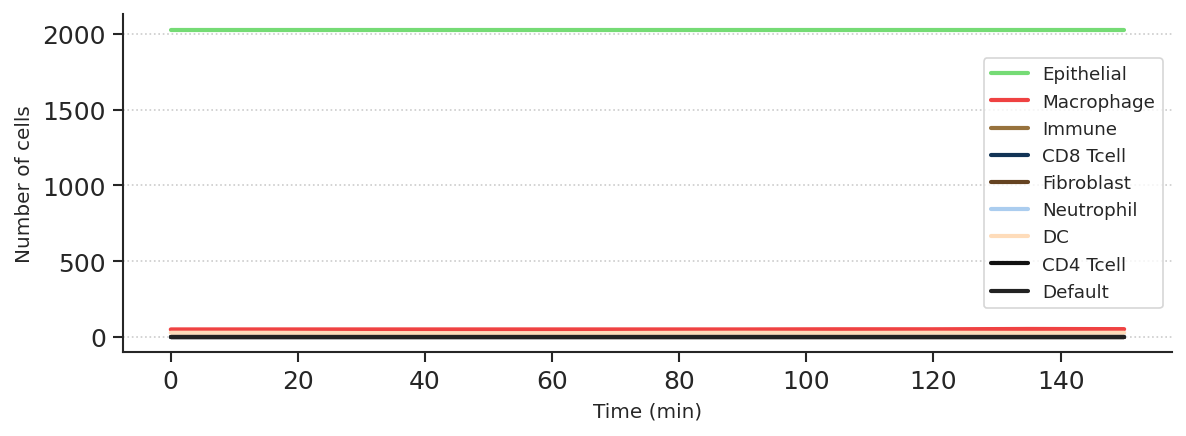

In [9]:
# parser = create_parser()
# args = parser.parse_args()
name = "PhysiCell/output_APN"
data_folder = f"../../{name}"
# print (data_folder)
fig_fname  = name
csv_fname = name

phases_dict = covid_type_dict
phase_grouping = covid_type_grouping
print(phases_dict)
print(phase_grouping)

# Globing output files according to the output format specified
# if args.format == 'physicell':
phase_col = "cell_type"
mcds = multicellds.MultiCellDS(output_folder=data_folder)
df_iterator = mcds.cells_as_frames_iterator()
num_of_files = mcds.cells_file_count()

columns = ["Epithelial", "immune", "CD8 Tcell", "macrophage", "neutrophil", "DC", "CD4 Tcell", "fibroblast","default"]
data = np.zeros((num_of_files, 9), dtype=int)
df_time_course = pd.DataFrame(columns=columns, data=data)

for i, (t, df) in enumerate(df_iterator):
    print("\tProcessing time step: %.0f" % t)

    # Rename the phases integer codes using the phases_dict as the mapping
    s = df[phase_col]
    s.replace(to_replace=phases_dict, inplace=True)
    
    # Count the number of cells in each phase
    counts = s.value_counts()

    df_time_course.loc[i, 'time'] = t
    # group the previous phases count into the three general classes:
    # Alive, Apoptotic, Necrotic
    for k, v in counts.to_dict().items():
        if k not in phase_grouping:
            continue
        df_time_course.loc[i, phase_grouping[k]] += v
        

sns.set_context('paper')
patch_color = "lightgrey"

fig, axes = plt.subplots(1, 1, figsize=(8,3), dpi=150, sharex=True)

# plot Alive vs Time
curve_params = {}
curve_params['Epithelial'] = {'color': '#75db75', 'label': 'Epithelial'}
curve_params['macrophage'] = {'color': '#ef4242', 'label': 'Macrophage'}
curve_params['immune'] = {'color':'#97723d', 'label': 'Immune'}
curve_params['CD8 Tcell'] = {'color':'#123456', 'label': 'CD8 Tcell'}
curve_params['fibroblast'] = {'color':'#654321', 'label': 'Fibroblast'}
curve_params['neutrophil'] = {'color':'#abcdef', 'label': 'Neutrophil'}
curve_params['DC'] = {'color':'#fedcba', 'label': 'DC'}
curve_params['CD4 Tcell'] = {'color':'#111111', 'label': 'CD4 Tcell'}
curve_params['default'] = {'color':'#222222', 'label': 'Default'}
line_width = 2.
for k,pdict in curve_params.items():
    c = pdict['color']
    l = pdict['label']
    axes.plot(df_time_course.time, df_time_course[k], "-", c=c, label=l, linewidth=line_width)

# setting axes labels
axes.set_xlabel("Time (min)")
axes.set_ylabel("Number of cells")

axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)

# Showing legend
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.yaxis.grid(linestyle='dotted')
axes.legend()
fig.tight_layout()

In [10]:
# name = "PhysiCell_ori/output_C141"
# data_folder = f"../../{name}"
# # print (data_folder)
# fig_fname  = name
# csv_fname = name

# phases_dict = covid_type_dict
# phase_grouping = covid_type_grouping
# print(phases_dict)
# print(phase_grouping)

# phase_col = "cell_type"
# mcds = multicellds.MultiCellDS(output_folder=data_folder)
# df_iterator = mcds.cells_as_frames_iterator()
# num_of_files = mcds.cells_file_count()

# columns = ["Epithelial", "immune", "CD8 Tcell", "macrophage", "neutrophil", "DC", "CD4 Tcell", "fibroblast","default"]
# data = np.zeros((num_of_files, 9), dtype=int)
# df_time_course = pd.DataFrame(columns=columns, data=data)

# for i, (t, df) in enumerate(df_iterator):
#     print("\tProcessing time step: %.0f" % t)

#     # Rename the phases integer codes using the phases_dict as the mapping
#     s = df[phase_col]
#     s.replace(to_replace=phases_dict, inplace=True)
    
#     # Count the number of cells in each phase
#     counts = s.value_counts()

#     df_time_course.loc[i, 'time'] = t
#     # group the previous phases count into the three general classes:
#     for k, v in counts.to_dict().items():
#         if k not in phase_grouping:
#             continue
#         df_time_course.loc[i, phase_grouping[k]] += v
        

# sns.set_context('paper')
# patch_color = "lightgrey"

# fig, axes = plt.subplots(1, 1, figsize=(8,3), dpi=150, sharex=True)

# curve_params = {}
# curve_params['Epithelial'] = {'color': '#75db75', 'label': 'Epithelial'}
# curve_params['macrophage'] = {'color': '#ef4242', 'label': 'Macrophage'}
# curve_params['immune'] = {'color':'#97723d', 'label': 'Immune'}
# curve_params['CD8 Tcell'] = {'color':'#123456', 'label': 'CD8 Tcell'}
# curve_params['fibroblast'] = {'color':'#654321', 'label': 'Fibroblast'}
# curve_params['neutrophil'] = {'color':'#abcdef', 'label': 'Neutrophil'}
# curve_params['DC'] = {'color':'#fedcba', 'label': 'DC'}
# curve_params['CD4 Tcell'] = {'color':'#111111', 'label': 'CD4 Tcell'}
# curve_params['default'] = {'color':'#222222', 'label': 'Default'}
# line_width = 2.
# for k,pdict in curve_params.items():
#     c = pdict['color']
#     l = pdict['label']
#     axes.plot(df_time_course.time, df_time_course[k], "-", c=c, label=l, linewidth=line_width)

# axes.set_xlabel("Time (min)")
# axes.set_ylabel("Number of cells")

# axes.tick_params(axis='x', labelsize=12)
# axes.tick_params(axis='y', labelsize=12)

# # Showing legend
# axes.spines['right'].set_visible(False)
# axes.spines['top'].set_visible(False)
# axes.yaxis.grid(linestyle='dotted')
# axes.legend()
# fig.tight_layout()

In [11]:
# # parser = create_parser()
# # args = parser.parse_args()
# name = "PhysiCell/output_APN"
# data_folder = f"../../{name}"
# # print (data_folder)
# fig_fname  = name
# csv_fname = name

# phases_dict = multicellds.default_phases_dict
# phase_grouping = multicellds.default_phase_grouping
# print(phases_dict)
# print(phase_grouping)

# # Globing output files according to the output format specified
# # if args.format == 'physicell':
# phase_col = "current_phase"
# mcds = multicellds.MultiCellDS(output_folder=data_folder)
# df_iterator = mcds.cells_as_frames_iterator()
# num_of_files = mcds.cells_file_count()
# # elif args.format == 'physiboss':
# #     phase_col = "phase"
# #     df_iterator = pb_output_iterator(args.data_folder)
# #     num_of_files = count_pb_files(args.data_folder)

# # Initializing a Pandas Databrafe to store the data
# columns = ["time", "alive", "apoptotic", "necrotic"]
# data = np.zeros((num_of_files, 4), dtype=int)
# df_time_course = pd.DataFrame(columns=columns, data=data)

# # print("Reading cell_output files from %i input files from %s" % (num_of_files, data_folder))
# # Iterating over all cell_output files
# for i, (t, df) in enumerate(df_iterator):
#     print("\tProcessing time step: %.0f" % t)

#     # Rename the phases integer codes using the phases_dict as the mapping
#     s = df[phase_col]
#     s.replace(to_replace=phases_dict, inplace=True)
    
#     # Count the number of cells in each phase
#     counts = s.value_counts()

#     df_time_course.loc[i, 'time'] = t
#     # group the previous phases count into the three general classes:
#     # Alive, Apoptotic, Necrotic
#     for k, v in counts.to_dict().items():
#         if k not in phase_grouping:
#             continue
#         df_time_course.loc[i, phase_grouping[k]] += v
        
#         # print("Finish processing files")    
# # Set time column as the dataframe index
# sns.set_context('paper')
# patch_color = "lightgrey"

# # print("Creating figure")
# # Create a figure
# # fig, ax = plt.subplots(1, 1, figsize=(8,3), dpi=300)
# fig, axes = plt.subplots(1, 1, figsize=(8,3), dpi=150, sharex=True)

# # plot Alive vs Time
# curve_params = {}
# curve_params['alive'] = {'color': '#75db75', 'label': 'Alive'}
# curve_params['apoptotic'] = {'color': '#ef4242', 'label': 'Apoptotic'}
# curve_params['necrotic'] = {'color':'#97723d', 'label': 'Necrotic'}
# line_width = 2.
# for k,pdict in curve_params.items():
#     c = pdict['color']
#     l = pdict['label']
#     axes.plot(df_time_course.time, df_time_course[k], "-", c=c, label=l, linewidth=line_width)

# # setting axes labels
# axes.set_xlabel("Time (min)")
# axes.set_ylabel("Number of cells")

# axes.tick_params(axis='x', labelsize=12)
# axes.tick_params(axis='y', labelsize=12)

# # Showing legend
# axes.spines['right'].set_visible(False)
# axes.spines['top'].set_visible(False)
# axes.yaxis.grid(linestyle='dotted')
# axes.legend()
# # color_dict = {"alive": "g", "apoptotic": "r", "necrotic":"k"}
# fig.tight_layout()

In [12]:
# name = "PhysiCell_ori/output_C141"
# data_folder = f"../../{name}"
# # print (data_folder)
# fig_fname  = name
# csv_fname = name

# phases_dict = multicellds.default_phases_dict
# phase_grouping = multicellds.default_phase_grouping
# print(phases_dict)
# print(phase_grouping)

# phase_col = "current_phase"
# mcds = multicellds.MultiCellDS(output_folder=data_folder)
# df_iterator = mcds.cells_as_frames_iterator()
# num_of_files = mcds.cells_file_count()

# columns = ["time", "alive", "apoptotic", "necrotic"]
# data = np.zeros((num_of_files, 4), dtype=int)
# df_time_course = pd.DataFrame(columns=columns, data=data)

# for i, (t, df) in enumerate(df_iterator):
#     print("\tProcessing time step: %.0f" % t)

#     # Rename the phases integer codes using the phases_dict as the mapping
#     s = df[phase_col]
#     s.replace(to_replace=phases_dict, inplace=True)
    
#     # Count the number of cells in each phase
#     counts = s.value_counts()

#     df_time_course.loc[i, 'time'] = t
#     # group the previous phases count into the three general classes:
#     # Alive, Apoptotic, Necrotic
#     for k, v in counts.to_dict().items():
#         if k not in phase_grouping:
#             continue
#         df_time_course.loc[i, phase_grouping[k]] += v

#        # print("Finish processing files")

# sns.set_context('paper')
# patch_color = "lightgrey"

# # print("Creating figure")
# # Create a figure
# # fig, ax = plt.subplots(1, 1, figsize=(8,3), dpi=300)
# fig, axes = plt.subplots(1, 1, figsize=(8,3), dpi=150, sharex=True)

# # plot Alive vs Time
# curve_params = {}
# curve_params['alive'] = {'color': '#75db75', 'label': 'Alive'}
# curve_params['apoptotic'] = {'color': '#ef4242', 'label': 'Apoptotic'}
# curve_params['necrotic'] = {'color':'#97723d', 'label': 'Necrotic'}
# line_width = 2.
# for k,pdict in curve_params.items():
#     c = pdict['color']
#     l = pdict['label']
#     axes.plot(df_time_course.time, df_time_course[k], "-", c=c, label=l, linewidth=line_width)

# # setting axes labels
# axes.set_xlabel("Time (min)")
# axes.set_ylabel("Number of cells")

# axes.tick_params(axis='x', labelsize=12)
# axes.tick_params(axis='y', labelsize=12)

# # Showing legend
# axes.spines['right'].set_visible(False)
# axes.spines['top'].set_visible(False)
# axes.yaxis.grid(linestyle='dotted')
# axes.legend()
# # color_dict = {"alive": "g", "apoptotic": "r", "necrotic":"k"}
# fig.tight_layout()